In [1]:
import torch
import cibsde.nn as nn
import matplotlib.pyplot as plt
device = torch.device('cuda:0')

In [2]:
d = 1
t = torch.tensor(1.,device=device)
D = torch.tensor(0.01,device=device) / torch.pi
N = 100
batch = 512
epoch = 10**4
lr = 1e-3

def data_gen(batch):
    return torch.rand([batch,1],device=device)*2-1

def pc(i,x):
    if i < N:
        return torch.zeros_like(x,device=device)
    else:
        return -torch.sin(torch.pi*x)

def refb(x):
    return x, x, torch.zeros(batch,device=device).bool()

def hitb(x):
    hit = (x[:,0] <= -1)*(x[:,0] >= 1)
    return hit

def f(t,xt,p,grad_p):
    return -p*grad_p

def mu(t,xt):
    return torch.zeros([batch,d],device=device)

def sigma(t,xt):
    return torch.eye(d,device=device).expand([batch,d,d]).clone()*torch.sqrt(2*D)

model = nn.BoundaryIBSDE(
    d = d,
    t = t,
    f = f,
    mu = mu,
    sigma = sigma,
    pc = pc,
    data_gen = data_gen,
    N = N,
    refb = refb,
    hitb = hitb,
    param = False
).to(device)

In [3]:
train_params = {
    'epoch': epoch,
    'batch': batch,
    'lr': lr
}

loss_values = nn.train(
    model,
    train_params
)

10000/10000|##################################################|3608.51s  [Loss: 1.592395e-03]       
Training has been completed.


In [4]:
shape = 501
x = torch.linspace(-1,1,shape)
y = model.p(x.to(device).unsqueeze(1)).detach().cpu()[:,0]

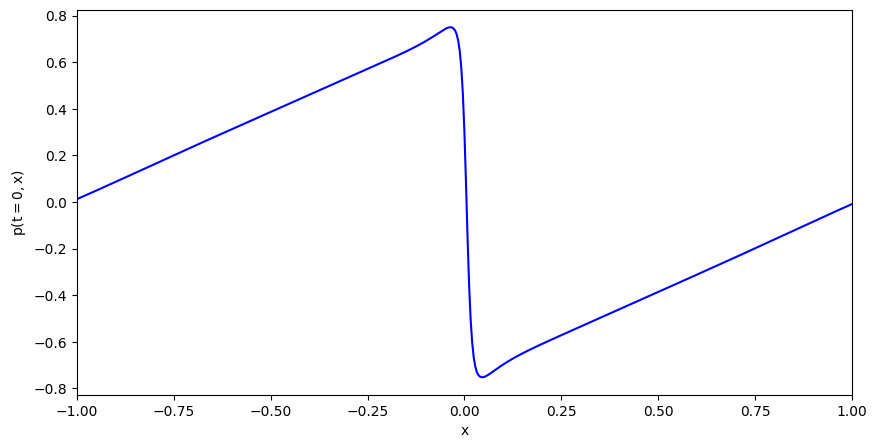

In [7]:
plt.figure(figsize=(10,5))
plt.xlim((-1,1))
plt.xlabel('$x$')
plt.ylabel('$p(t=0,x)$')
plt.plot(x,y,c='b')
plt.show()